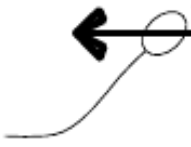

In [1]:
from PIL import Image
import cv2

template = cv2.imread("/home/sadid/PycharmProjects/sgs-drawing-analysis/img_templates/left-bottom.png", cv2.IMREAD_COLOR)
Image.fromarray(template)

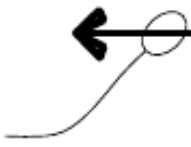

In [2]:
gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

Image.fromarray(gray)

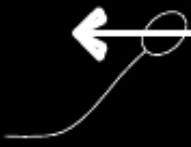

In [3]:
inverted_image = cv2.bitwise_not(gray)
Image.fromarray(inverted_image)

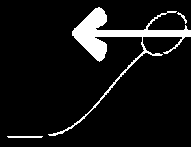

In [4]:
ret, thresh = cv2.threshold(inverted_image, 100, 255, 0)
Image.fromarray(thresh)

3
Area of contour 2: 1855.0
0.0


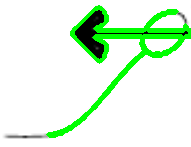

In [5]:

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

print(len(contours))

img_copy = template.copy()

for i, cnt in enumerate(contours):
    area = cv2.contourArea(cnt)

    if area > 100:
        print(f"Area of contour {i}: {area}")
        cv2.drawContours(img_copy, [cnt], -1, (0,255,0), 3)
        ret = cv2.matchShapes(cnt, cnt, cv2.CONTOURS_MATCH_I1, 0.0)
        print(ret)

Image.fromarray(img_copy)